In the first and second parts of this workshop, we will be using the Advertising database. The main objective is to create a regression model to predict the Sales variable.

The third part addresses the classification problem by applying logistic regression to the diabetescsv.csv database.

To do this, we start by learning how to:

Retrieve data from a CSV file and explore its main characteristics.
Visualize the data in the form of graphs.

# Part 1: Simple Linear Regression

## Retrieve data from the advertising.csv file and explore its main characteristics.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./dataset/advertising.csv")

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
#Checking null values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# test_data = test_data.dropna()

## Initialize X (predictors, independent variable) with the TV variable and y (target, dependent variable).

In [6]:
X = data['TV'].values
y = data['Sales'].values

In [7]:
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [8]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [9]:
X.max()

296.4

## Why is this a regression problem?

Supervised learning: We have the target column.
It's a prediction task.
(R) Among the assumptions of regression, X must be deterministic.
It involves continuous variables.

Visualize the database with Matplotlib.

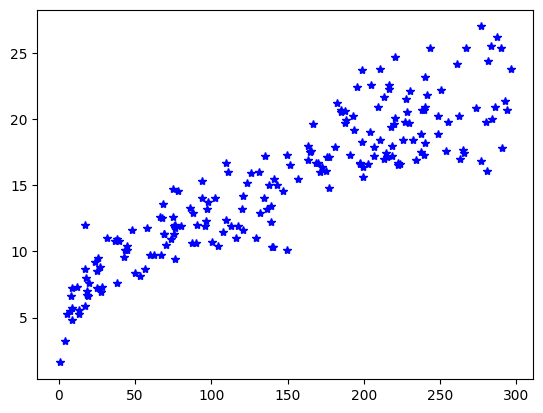

In [10]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b*")
plt.show()

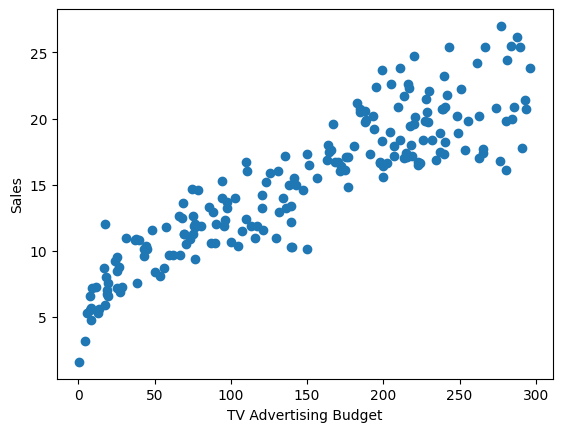

In [11]:
plt.scatter(X, y)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.show()

## Consider the simple linear regression model defined as
## y = w0 + w1x

Using the train-test split function from sklearn.model_selection, split the database into a training set and a test set.

80% for the training set and 20% for the test set.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define a function MSE(X, y, W) that returns the mean of the errors between the theoretical and actual values.

We use MSE for the case of finding the derivative at 0.

In [13]:
def MSE(X,y,w0, w1):
    y_pred = w0 + w1 * X
    return np.mean((y - y_pred)**2, axis=0)

- The sum of elements, along with an axis divided by the number of elements, is known as arithmetic mean. 
- The numpy.mean() function is used to compute the arithmetic mean along the specified axis.
- This function returns the average of the array elements.

Define the Gradient(X, y, W) function.

In [14]:
import numpy as np

def Gradient(X, y, w0, w1):
    y_pred = w0 + w1 * X
    dW0 = -2 * np.mean(y - y_pred)
    dW1 = -2 * np.mean((y - y_pred) * X)
    return dW0, dW1

Establish a parameter update function MiseJour(grad, W, alpha).

Here's a detailed explanation of this function:

grad: It's a vector containing the gradients of the model's parameters. In the context of simple linear regression, this is typically a two-element vector, where the first element represents the partial derivative of the cost function with respect to w0 (the intercept) and the second element represents the partial derivative with respect to w1 (the coefficient of the predictor variable).

W: It's a vector containing the current model parameters. In the case of simple linear regression, W = [w0, w1].

alpha: It's the learning rate, also known as the "learning rate." It determines the size of the steps the gradient descent algorithm will take to update the parameters. The choice of this value is crucial because too small an alpha can lead to slow convergence, while too large an alpha can prevent convergence.

The parameter update function MiseJour(grad, W, alpha) is typically implemented as follows for simple linear regression:

Update w0 and w1 as follows:
w0_new = w0 - alpha * grad[0]
w1_new = w1 - alpha * grad[1]
In other words, you subtract the product of the learning rate (alpha) and the partial derivative of the cost function with respect to each parameter (w0 and w1) from the current parameters to get the new parameters. This allows the algorithm to approach the optimal parameter values that minimize the cost function.

The parameter update is done iteratively at each step of the gradient descent, contributing to the algorithm's convergence towards the optimal parameters that provide the best model fit to the data.

In [15]:
def MiseJour(grad, W, alpha):
    return [w - alpha * g for w, g in zip(W, grad)]

The code [w - alpha * g for w, g in zip(W, grad)] is a Python list comprehension that implements the parameter update of the model using the gradient and the learning rate (alpha). It updates the parameters by subtracting the product of alpha and the gradient (g) corresponding to each parameter (w) in the W vector. Here's how it works:

W is the vector containing the current model parameters. In the context of simple linear regression, W is a vector with two elements, representing w0 and w1.

grad is the vector containing the gradients corresponding to each parameter in W. In the context of simple linear regression, grad is also a vector with two elements, corresponding to the partial derivatives of the cost function with respect to w0 and w1.

alpha is the learning rate, which determines the size of the update steps.

The expression [w - alpha * g for w, g in zip(W, grad)] creates a new vector of updated parameters by simultaneously iterating through the elements of W and grad, performing the update for each pair of parameters.

Here's a detailed breakdown of this code:

w and g are the corresponding elements of W and grad at each iteration.

w - alpha * g calculates the new value of the parameter by subtracting the product of alpha (the learning rate) and g (the gradient) from the current value of w.

The list comprehension [w - alpha * g for w, g in zip(W, grad)] iterates through all the elements of W and grad, performs these updates for each element, and returns a new vector of updated parameters.

Write the function Batch Gradient Descent(X, y, W, N_max, alpha, eps), which returns the best estimated parameters and also displays the evolution of MSE after each iteration.

In [17]:
def Batch_Gradient_Descent(X, y, W, N_max, alpha, eps):
    errors = []
    for _ in range(N_max):
        grad = Gradient(X, y, W[0], W[1])
        print("grad: ", grad)
        W = MiseJour(grad, W, alpha)
#         print("W: ",W)
        error = MSE(X, y, W[0], W[1])
#         print("error: ",error)
        errors.append(error)
#         print("errors: ",errors)
        if error < eps:
            break
    return W, errors

In [18]:
# Initialisation des paramètres et appel de la descente de gradient
initial_w0, initial_w1 = 0, 0
alpha = 0.1
N_max = 100
eps = 0.0001

W, errors = Batch_Gradient_Descent(X_train, y_train, [initial_w0, initial_w1], N_max, alpha, eps)

grad:  (-30.661250000000003, -5385.64225)
grad:  (161565.60786371873, 31865411.96050173)
grad:  (-955956584.800108, -188538566971.1529)
grad:  (5656122830813.761, 1115529003600081.6)
grad:  (-3.346566788462675e+16, -6.600267403450073e+18)
grad:  (1.9800682560538286e+20, 3.905190242159149e+22)
grad:  (-1.1715499933091437e+24, -2.310589843599871e+26)
grad:  (6.931727644369361e+27, 1.3671102031626206e+30)
grad:  (-4.101305826480038e+31, -8.088801709088608e+33)
grad:  (2.4266258493266914e+35, 4.785913596255408e+37)
grad:  (-1.435765402960531e+39, -2.831688768570784e+41)
grad:  (8.495014972787806e+42, 1.675429595787881e+45)
grad:  (-5.026258415134187e+46, -9.913039743625252e+48)
grad:  (2.9738939527044305e+50, 5.865263285651968e+52)
grad:  (-1.7595683531316935e+54, -3.470309239115003e+56)
grad:  (1.0410864807492662e+58, 2.0532831398289523e+60)
grad:  (-6.15981219751894e+61, -1.2148691548252326e+64)
grad:  (3.6445854412973917e+65, 7.188034785444764e+67)
grad:  (-2.1563974051460608e+69, -4.25

C:\Users\R1304\AppData\Local\Temp\ipykernel_22968\2432369924.py:3: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred)**2, axis=0)
C:\Users\R1304\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\R1304\AppData\Local\Temp\ipykernel_22968\1708837584.py:6: RuntimeWarning: overflow encountered in multiply
  dW1 = -2 * np.mean((y - y_pred) * X)
C:\Users\R1304\AppData\Local\Temp\ipykernel_22968\1406304670.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return [w - alpha * g for w, g in zip(W, grad)]


In [19]:
W

[nan, nan]

In [20]:
errors

[8579583096.280955,
 3.003499148846975e+17,
 1.051450525316459e+25,
 3.6808673896667184e+32,
 1.2885803386929734e+40,
 4.51100002659004e+47,
 1.5791891765581164e+55,
 5.528349458342716e+62,
 1.9353379688284252e+70,
 6.775138007849036e+77,
 2.3718077030849598e+85,
 8.303110244981005e+92,
 2.9067128692868995e+100,
 1.017568050428482e+108,
 3.562253252440605e+115,
 1.2470564724570755e+123,
 4.3656352743354395e+130,
 1.528300583771508e+138,
 5.350201122130814e+145,
 1.8729726567669363e+153,
 6.556812525207389e+160,
 2.2953773689855957e+168,
 8.035546610179447e+175,
 2.8130454798768897e+183,
 9.847774215921183e+190,
 3.447461397318263e+198,
 1.2068706923423145e+206,
 4.2249548295677496e+213,
 1.4790518508029887e+221,
 5.1777935282388745e+228,
 1.812617036144963e+236,
 6.3455224736249346e+243,
 2.2214099647278653e+251,
 7.776605081619528e+258,
 2.722396475919258e+266,
 9.530434546065585e+273,
 3.336368653143018e+281,
 1.1679798791830201e+289,
 4.088807742787243e+296,
 1.4313901339782567e+304

Plot the evolution of the MSE error after each iteration.

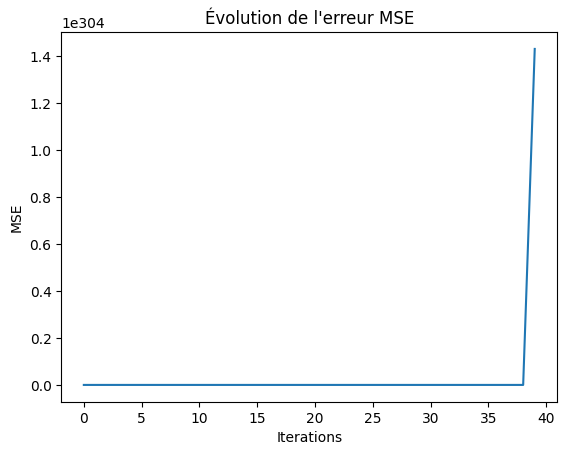

In [23]:
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Évolution de l\'erreur MSE')
plt.show()

Provide the error of this model.

In [25]:
final_w0, final_w1 = W[0], W[1]
test_error = MSE(X_test, y_test, final_w0, final_w1)
print(f'Erreur sur l\'ensemble de test (MSE) : {test_error}')

Erreur sur l'ensemble de test (MSE) : nan
